In [1]:
import os 
# os.chdir("C:\\Users\\Joseph\\Active Github Repositories\\pneumothorax-seg-cnn")
os.chdir("C:\\Users\\Joseph\\Active Github Repositories\\efficientnet-pneumothorax-seg")
os.getcwd()
data_dir = "C:\\Users\\Joseph\\Datasets\\SIIM Pneumothorax Segmentation 2019"
train_dir = os.path.join(data_dir, "all_256\\train")
masks_dir = os.path.join(data_dir, "all_256\\masks")
assert os.path.isdir(train_dir)
assert os.path.isdir(masks_dir)

In [2]:
from efficientnet_seg.io.generators_grayscale import GrayscaleClassificationGenerator, GrayscaleSegmentationGenerator
model_name = "densenet"
batch_size = 6
gen = GrayscaleClassificationGenerator(train_dir, masks_dir, batch_size, model_name=model_name)
gen_seg = GrayscaleSegmentationGenerator(train_dir, masks_dir, batch_size, model_name=model_name)
%time x, y = gen[0]
%time x_seg, y_seg = gen_seg[0]
print("Classification: ", x.shape, y.shape)
print("Segmentation: ", x_seg.shape, y_seg.shape)

Wall time: 139 ms
Wall time: 59 ms
Classification:  (6, 256, 256, 1) (6, 1)
Segmentation:  (6, 256, 256, 1) (6, 256, 256, 1)


In [3]:
# testing all model names
for model_name in ["densenet", "xception", "inception"]:
    print("Model: {0}".format(model_name))
    batch_size = 6
    gen = GrayscaleClassificationGenerator(train_dir, masks_dir, batch_size, model_name=model_name)
    gen_seg = GrayscaleSegmentationGenerator(train_dir, masks_dir, batch_size, model_name=model_name)
    %time x, y = gen[0]
    %time x_seg, y_seg = gen_seg[0]
    print("Classification: ", x.shape, y.shape)
    print("Segmentation: ", x_seg.shape, y_seg.shape)
    print("Mean: {0}, Std: {1}, Min: {2}, Max: {3}".format(x.mean(), x.std(), x.min(), x.max()))

Model: densenet
Wall time: 39 ms
Wall time: 52 ms
Classification:  (6, 256, 256, 1) (6, 1)
Segmentation:  (6, 256, 256, 1) (6, 256, 256, 1)
Mean: 0.37677302956581116, Std: 1.1800075769424438, Min: -1.9867256879806519, Max: 2.4380531311035156
Model: xception
Wall time: 82 ms
Wall time: 57 ms
Classification:  (6, 256, 256, 1) (6, 1)
Segmentation:  (6, 256, 256, 1) (6, 256, 256, 1)
Mean: 0.1500118374824524, Std: 0.5129260420799255, Min: -1.0, Max: 1.0
Model: inception
Wall time: 52 ms
Wall time: 26 ms
Classification:  (6, 256, 256, 1) (6, 1)
Segmentation:  (6, 256, 256, 1) (6, 256, 256, 1)
Mean: 0.18440501391887665, Std: 0.5008696913719177, Min: -1.0, Max: 1.0


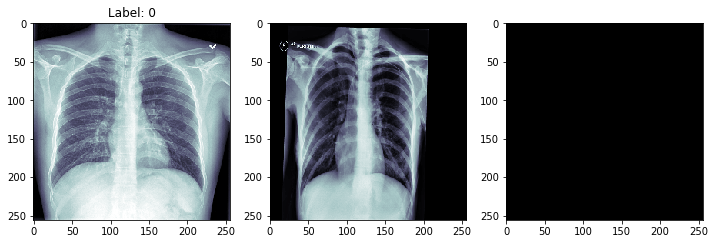

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
slice_ = 0
ax1.imshow(x[slice_].squeeze(), cmap="bone")
ax1.set_title("Label: {0}".format(int(y[slice_])))

ax2.imshow(x_seg[slice_].squeeze(), cmap="bone")
ax3.imshow(y_seg[slice_].squeeze(), cmap="bone")


In [6]:
# testing a full iteration
## Segmentation # Works
for i in range(len(gen_seg)):
    x, y = gen_seg[i]

## Classification 
for i in range(len(gen)):
    x, y = gen[i]

In [7]:
model_name = None
gen = GrayscaleClassificationGenerator(train_dir, masks_dir, batch_size, model_name=model_name)
gen_seg = GrayscaleSegmentationGenerator(train_dir, masks_dir, batch_size, model_name=model_name)

# testing a full iteration when model_name = None
## Segmentation # Works
for i in range(len(gen_seg)):
    x, y = gen_seg[i]

## Classification 
for i in range(len(gen)):
    x, y = gen[i]